# 다층 퍼셉트론으로 숫자 필기 데이터 분류기 만들기

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt # 시각화를 위한 맷플롯립
from sklearn.datasets import load_digits
digits = load_digits() # 1,979개의 (8x8) 이미지 데이터 로드

X = digits.data # 이미지. 즉, 특성 행렬
Y = digits.target # 각 이미지에 대한 레이블

In [2]:
import torch
import torch.nn as nn
from torch import optim

X = torch.tensor(X, dtype=torch.float32)
Y = torch.tensor(Y, dtype=torch.int64)

model = nn.Sequential(
    nn.Linear(64, 32), # input_layer = 64, hidden_layer1 = 32
    nn.ReLU(),
    nn.Linear(32, 16), # hidden_layer2 = 32, hidden_layer3 = 16
    nn.ReLU(),
    nn.Linear(16, 10) # hidden_layer3 = 16, output_layer = 10
)

loss_fn = nn.CrossEntropyLoss() # 이 비용 함수는 소프트맥스 함수를 포함하고 있음.
optimizer = optim.Adam(model.parameters())

losses = []

for epoch in range(100):
  y_pred = model(X)
  loss = loss_fn(y_pred, Y)

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  if epoch % 10 == 0:
    print('Epoch {:4d}/{} Cost: {:.6f}'.format(
            epoch, 100, loss.item()
        ))

  losses.append(loss.item())


Epoch    0/100 Cost: 2.486953
Epoch   10/100 Cost: 2.148836
Epoch   20/100 Cost: 1.929911
Epoch   30/100 Cost: 1.645413
Epoch   40/100 Cost: 1.317089
Epoch   50/100 Cost: 0.994948
Epoch   60/100 Cost: 0.722524
Epoch   70/100 Cost: 0.514864
Epoch   80/100 Cost: 0.374934
Epoch   90/100 Cost: 0.286897


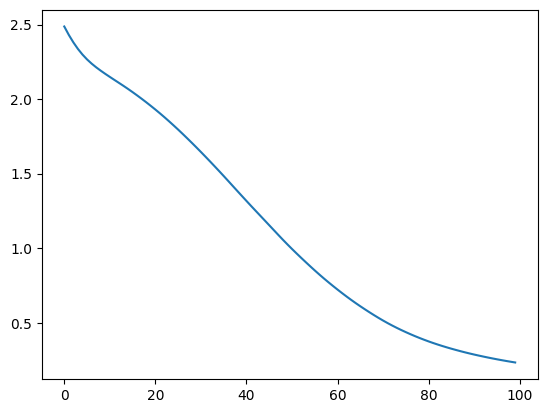

In [3]:
plt.plot(losses)